# 1)Data Loading

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import seaborn as sns
from collections import Counter
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
spam_data = pd.read_csv('spam.csv', encoding='latin1')
pd.set_option('display.max_colwidth', None)
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [11]:
spam_data.shape

(5572, 5)

# 2)Data Cleaning

In [12]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
''' Column Unnamed: 2,Unnamed: 3,Unnamed: 4 
contains mostly null values which needs to be dropped '''

' Column Unnamed: 2,Unnamed: 3,Unnamed: 4 \ncontains mostly null values which needs to be dropped '

### a)Dropping Columns

In [14]:
# dropping the last 3 columns
spam_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [16]:
'''Using clear and relevent names for Columns'''

'Using clear and relevent names for Columns'

### b)Renaming Columns

In [17]:
spam_data.rename(columns={'v1':'type','v2':'messages'},inplace=True)
spam_data.sample(5)

,type,messages
1341,ham,Just chill for another 6hrs. If you could sleep the pain is not a surgical emergency so see how it unfolds. Okay
4376,ham,How much is torch in 9ja.
1264,ham,I will see in half an hour
2196,ham,"Not much, just some textin'. How bout you?"
5113,ham,U definitely need a module from e humanities dis sem izzit? U wan 2 take other modules 1st?


In [18]:
'''Most Of the Models need to be provided with numerical data as they handle it correctly.'''

'Most Of the Models need to be provided with numerical data as they handle it correctly.'

### c)Encoding 

In [19]:
encoder = LabelEncoder()
spam_data['type'] = encoder.fit_transform(spam_data['type'])

In [20]:
spam_data.head()

,type,messages
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


### d)Handling Missing Values

In [21]:
spam_data.isnull().sum()

type        0
messages    0
dtype: int64

In [22]:
'''No missing values found'''

'No missing values found'

### e)Handling Duplicate Values

In [23]:
spam_data.duplicated().sum()

np.int64(403)

In [24]:
'''These Duplicated Values need to be removed'''

'These Duplicated Values need to be removed'

In [25]:
spam_data = spam_data.drop_duplicates(keep='first')
spam_data.duplicated().sum()

np.int64(0)

In [26]:
spam_data.shape

(5169, 2)

# 3)EDA

### a) PieChart

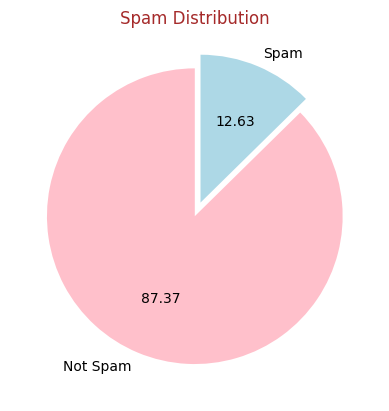

In [27]:
plt.pie(spam_data['type'].value_counts(),
        labels=['Not Spam','Spam'],
        autopct="%0.2f",
        startangle=90,     
        colors=['pink','lightblue'],
        explode=(0, 0.1),   
        )
plt.title('Spam Distribution',color='brown')
plt.savefig('piechart.png')
plt.show()

In [28]:
'''The chart highlights the class imbalance, with non-spam emails likely
dominating the dataset (larger slice) and spam emails forming a smaller minority (smaller slice).'''

'The chart highlights the class imbalance, with non-spam emails likely\ndominating the dataset (larger slice) and spam emails forming a smaller minority (smaller slice).'

### b)HistPlot

In [29]:
spam_data['total_characters'] = spam_data['messages'].apply(len)

In [30]:
spam_data['total_words'] = spam_data['messages'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
spam_data['total_sentences'] = spam_data['messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
spam_data.head()

,type,messages,total_characters,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1


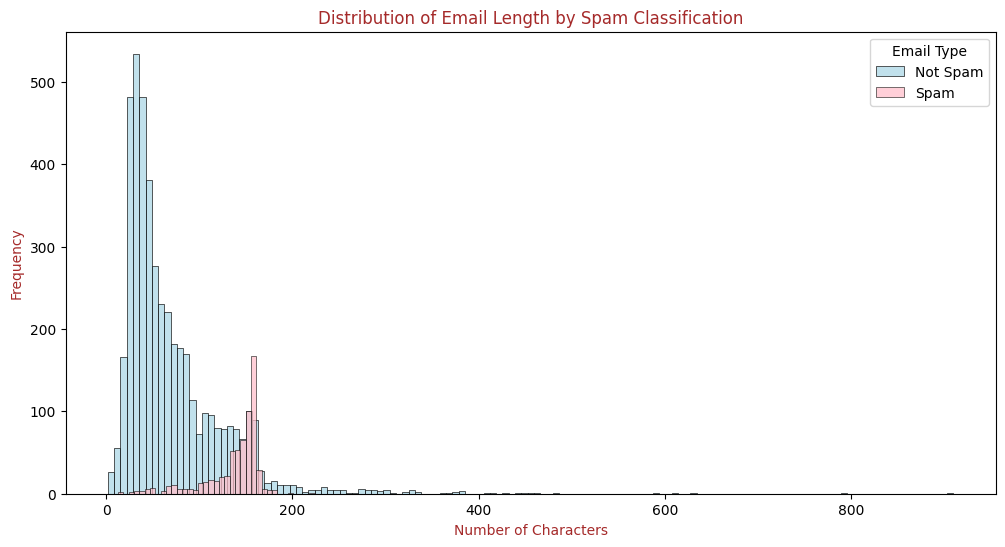

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(spam_data[spam_data['type'] == 0]['total_characters'], label='Not Spam', color='lightblue')
sns.histplot(spam_data[spam_data['type'] == 1]['total_characters'], label='Spam', color='pink')
plt.title('Distribution of Email Length by Spam Classification',color='brown')
plt.xlabel('Number of Characters',color='brown')
plt.ylabel('Frequency',color='brown')
plt.savefig('HistplotCharacter.png')
plt.legend(title='Email Type')
plt.show()

In [34]:
'''
  → Spam emails are generally longer in terms of character count than non-spam emails.
  → Non-spam emails are shorter and more concise, dominating the lower character ranges.
'''

'\n  → Spam emails are generally longer in terms of character count than non-spam emails.\n  → Non-spam emails are shorter and more concise, dominating the lower character ranges.\n'

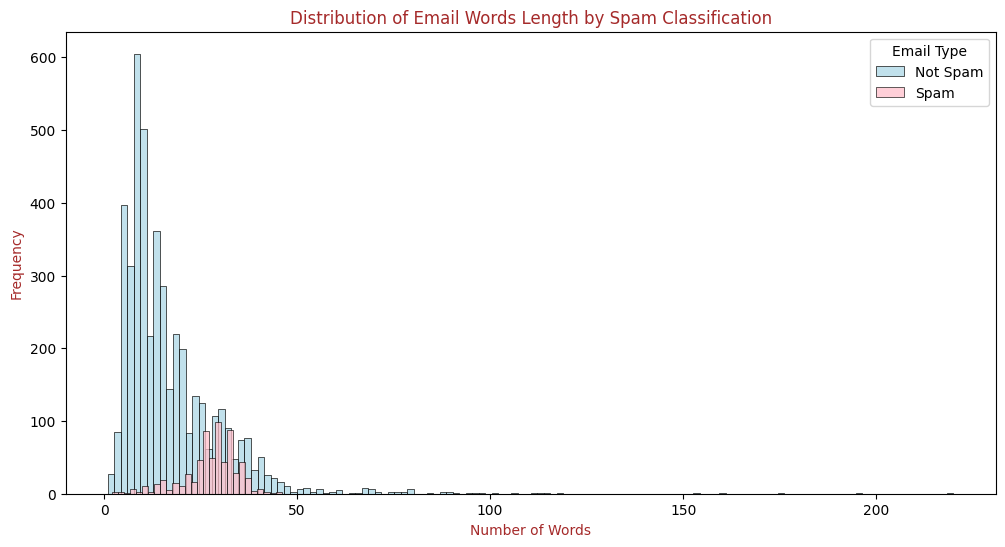

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(spam_data[spam_data['type'] == 0]['total_words'], label='Not Spam', color='lightblue')
sns.histplot(spam_data[spam_data['type'] == 1]['total_words'], label='Spam', color='pink')
plt.title('Distribution of Email Words Length by Spam Classification',color='brown')
plt.xlabel('Number of Words',color='brown')
plt.ylabel('Frequency',color='brown')
plt.legend(title='Email Type')
plt.savefig('HistplotWords.png')
plt.show()

In [36]:
'''
   → Spam emails generally tend to be longer (in word count) than non-spam emails.
   → However, non-spam emails dominate shorter lengths and appear more frequently in total.
'''

'\n   → Spam emails generally tend to be longer (in word count) than non-spam emails.\n   → However, non-spam emails dominate shorter lengths and appear more frequently in total.\n'

### c)Heatmap

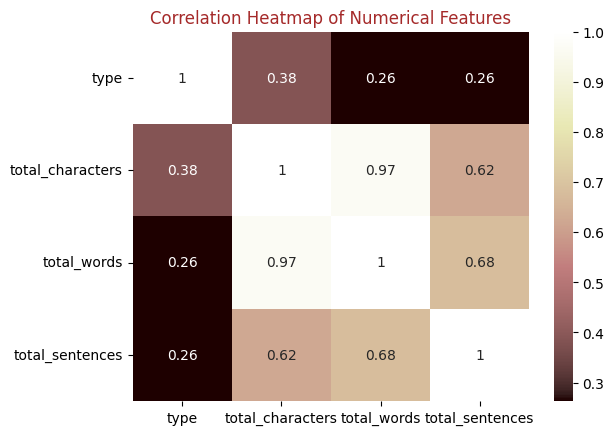

In [37]:
numerical_data = spam_data[['type', 'total_characters', 'total_words', 'total_sentences']]
sns.heatmap(numerical_data.corr(), annot=True,cmap='pink')
plt.title('Correlation Heatmap of Numerical Features',color='brown')
plt.savefig('Heatmap.png')
plt.show()

In [38]:
'''
total_characters and total_words show a very strong positive correlation (close to +1):
→ Emails with more words naturally have more characters.

total_words and total_sentences are also strongly positively correlated:
→ Longer emails tend to have more sentences and words.

total_characters and total_sentences have a strong positive correlation as well:
→ More characters generally indicate more sentences.

values ( 1 = spam, 0 = non spam) shows:

A slight positive correlation with total_characters, total_words, and total_sentences
→ Spam emails tend to be slightly longer (more words/characters/sentences) than non-spam (ham), but the correlation is weak.
'''

'\ntotal_characters and total_words show a very strong positive correlation (close to +1):\n→ Emails with more words naturally have more characters.\n\ntotal_words and total_sentences are also strongly positively correlated:\n→ Longer emails tend to have more sentences and words.\n\ntotal_characters and total_sentences have a strong positive correlation as well:\n→ More characters generally indicate more sentences.\n\nvalues ( 1 = spam, 0 = non spam) shows:\n\nA slight positive correlation with total_characters, total_words, and total_sentences\n→ Spam emails tend to be slightly longer (more words/characters/sentences) than non-spam (ham), but the correlation is weak.\n'

# 4)Data Preprocessing
 - Lower case
 - Tokenization
 - Removing special characters
 - Removing stop words and punctuation
 - Stemming

In [39]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def transformed_messages(messages):
   
    messages = messages.lower()
    
    # Tokenizing and removing non-alphanumeric tokens in one step
    tokens = [token for token in word_tokenize(messages) 
              if token.isalnum()]
    
    tokens = [token for token in tokens 
              if token not in stop_words and 
              token not in punctuation]
    
    tokens = [stemmer.stem(token) for token in tokens]
    
    return " ".join(tokens)

In [40]:
spam_data['transformed_messages'] = spam_data['messages'].apply(transformed_messages)
spam_data.head()

,type,messages,total_characters,total_words,total_sentences,transformed_messages
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


### d)Barplot

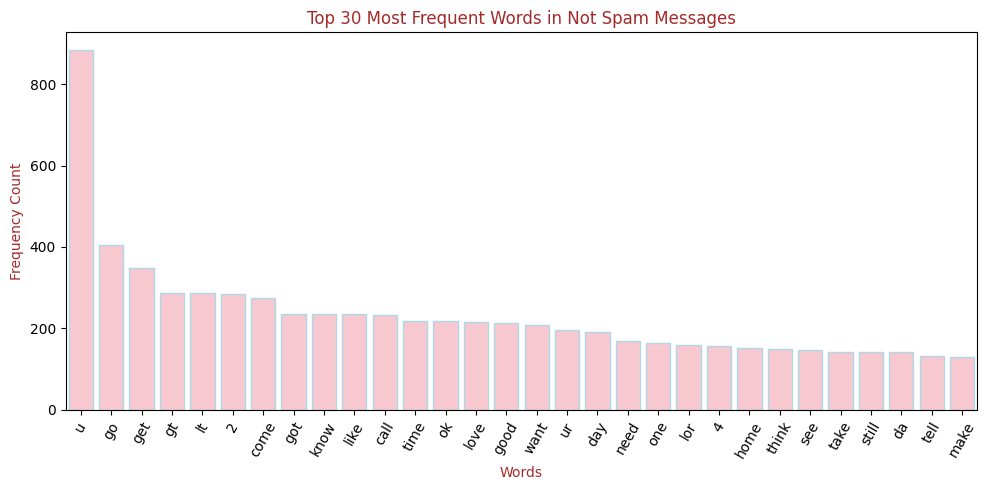

In [41]:
NotSpam_corpus = []
for msg in spam_data[spam_data['type'] == 0]['transformed_messages'].tolist():
    for word in msg.split():
        NotSpam_corpus.append(word)

top_NotSpam_words = pd.DataFrame(Counter(NotSpam_corpus).most_common(30), 
                            columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_NotSpam_words, x='Word', y='Frequency',
                color='pink',               
                edgecolor='lightblue',)           

plt.title('Top 30 Most Frequent Words in Not Spam Messages', 
         color='brown')
plt.xlabel('Words', color='brown')
plt.ylabel('Frequency Count', color='brown')
plt.xticks(rotation=60)  


plt.tight_layout()
plt.savefig('barplotNotSpamCorpus.png')
plt.show()

In [42]:
'''
  The above visualization shows the 30 most frequently occurring words in not spam messages.
  Words like 'u', 'go', 'get', 'call', 'come' dominate not spam messages
'''

"\n  The above visualization shows the 30 most frequently occurring words in not spam messages.\n  Words like 'u', 'go', 'get', 'call', 'come' dominate not spam messages\n"

# 5)Model Building

### a)Feature Engineering

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = tfidf.fit_transform(spam_data['transformed_messages']).toarray()

In [45]:
X.shape

(5169, 3000)

### b)Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
Y = spam_data['type'].values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

### c)Model Training & Evaluation

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
models = {
    "NB": MultinomialNB(),
    "LogisticReg": LogisticRegression(solver='liblinear', penalty='l1'),
    "RanForest": RandomForestClassifier(n_estimators=50, random_state=2),
    "SVM": SVC(kernel='sigmoid', gamma=1.0),
    "GBoost": GradientBoostingClassifier(n_estimators=50,random_state=2)
}

In [50]:
from sklearn.model_selection import cross_val_score
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    cv_score = cross_val_score(model, X_train, y_train, cv=3, scoring='f1')
    
    model_scores[name] = {
        'Model': model,
        'CV Mean F1-Score': cv_score.mean(),
        'CV Std F1-Score': cv_score.std()
    }

for name, scores in model_scores.items():
    print(f"{name}:")
    print(f"  Mean F1-Score (CV): {scores['CV Mean F1-Score']:.4f}")
    print(f"  Std F1-Score (CV): {scores['CV Std F1-Score']:.4f}\n")

NB:
  Mean F1-Score (CV): 0.8313
  Std F1-Score (CV): 0.0234

LogisticReg:
  Mean F1-Score (CV): 0.7394
  Std F1-Score (CV): 0.0238

RanForest:
  Mean F1-Score (CV): 0.8544
  Std F1-Score (CV): 0.0236

SVM:
  Mean F1-Score (CV): 0.8589
  Std F1-Score (CV): 0.0275

GBoost:
  Mean F1-Score (CV): 0.7524
  Std F1-Score (CV): 0.0172



In [51]:
'''
-SVM is the top performer but
 Slowest to train (especially on larger datasets).
-Random Forest is the best trade-off
-Naive Bayes is fast but weaker
-XGBoost & Logistic Regression underperformed
'''

'\n-SVM is the top performer but\n Slowest to train (especially on larger datasets).\n-Random Forest is the best trade-off\n-Naive Bayes is fast but weaker\n-XGBoost & Logistic Regression underperformed\n'


MODEL EVALUATION SUMMARY

Evaluation for MultinomialNB
--------------------------------------------------
Accuracy:  0.9710
Precision: 1.0000
Recall:    0.7826
F1-Score:  0.8780


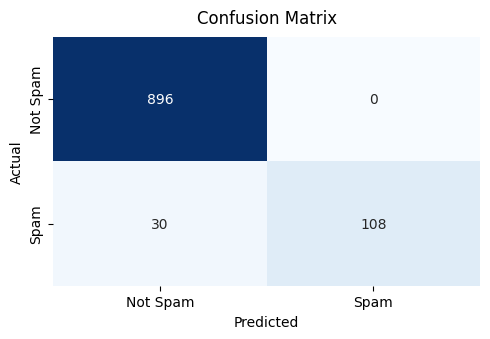


Evaluation for LogisticRegression
--------------------------------------------------
Accuracy:  0.9555
Precision: 0.9600
Recall:    0.6957
F1-Score:  0.8067


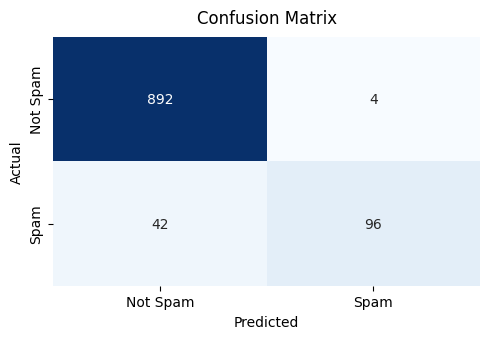


Evaluation for RandomForestClassifier
--------------------------------------------------
Accuracy:  0.9739
Precision: 0.9826
Recall:    0.8188
F1-Score:  0.8933


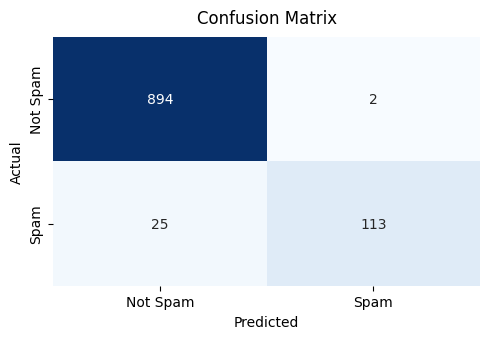


Evaluation for SVC
--------------------------------------------------
Accuracy:  0.9758
Precision: 0.9748
Recall:    0.8406
F1-Score:  0.9027


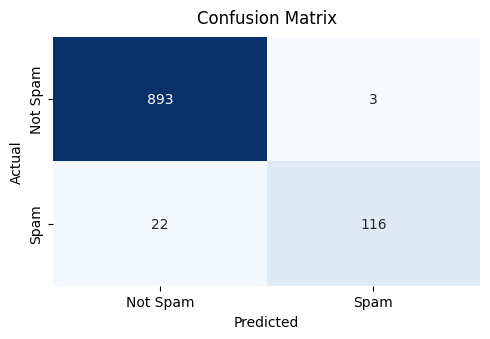


Evaluation for GradientBoostingClassifier
--------------------------------------------------
Accuracy:  0.9507
Precision: 0.9307
Recall:    0.6812
F1-Score:  0.7866


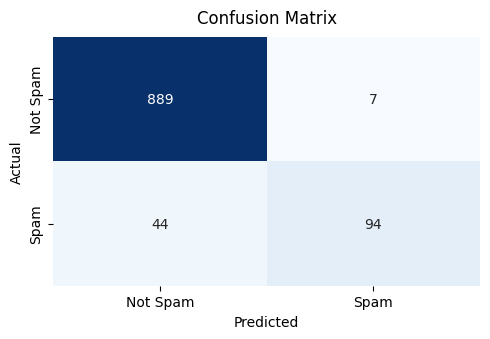

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML


display(HTML("<style>.output { max-height: none !important; overflow-y: visible !important; }</style>"))

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    metrics = {
        'Model': model.__class__.__name__,
        'Accuracy': f"{accuracy_score(y_test, y_pred):.4f}",
        'Precision': f"{precision_score(y_test, y_pred):.4f}",
        'Recall': f"{recall_score(y_test, y_pred):.4f}",
        'F1-Score': f"{f1_score(y_test, y_pred):.4f}"
    }
    
    print(f"\n\033[1mEvaluation for {metrics['Model']}\033[0m")
    print("-"*50)
    print(f"Accuracy:  {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall:    {metrics['Recall']}")
    print(f"F1-Score:  {metrics['F1-Score']}")
    
    plt.figure(figsize=(5, 3.5)) 
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Spam', 'Spam'], 
                yticklabels=['Not Spam', 'Spam'],
                cbar=False)
    plt.title(f"Confusion Matrix", pad=10)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
    
    return metrics

print("\n\033[1mMODEL EVALUATION SUMMARY\033[0m")
print("="*50)
all_metrics = []
for name, model_data in model_scores.items():
    all_metrics.append(evaluate_model(model_data['Model'], X_test, y_test))

In [1]:
'''
Best Overall Model → SVM
Highest F1-Score (0.9027): Best balance of precision and recall.
Strong Recall (0.8406): Captures most spam emails.
Good Precision (0.9748): Few false positives.
'''

'\nBest Overall Model → SVM\nHighest F1-Score (0.9027): Best balance of precision and recall.\nStrong Recall (0.8406): Captures most spam emails.\nGood Precision (0.9748): Few false positives.\n'

### d) Best Model Hypertuning

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],         
    'kernel': ['linear', 'rbf']  
}

svm_grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)

print("Best SVM Parameters:", svm_grid.best_params_)

Best SVM Parameters: {'C': 1, 'kernel': 'linear'}


### Final Model Evaluation

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
best_svm = svm_grid.best_estimator_

y_pred = best_svm.predict(X_test)
y_pred_proba = best_svm.predict_proba(X_test)[:, 1]

print("Test Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Test Performance:
Accuracy: 0.9787
Precision: 0.9754
Recall: 0.8623
F1-Score: 0.9154
ROC-AUC: 0.9894


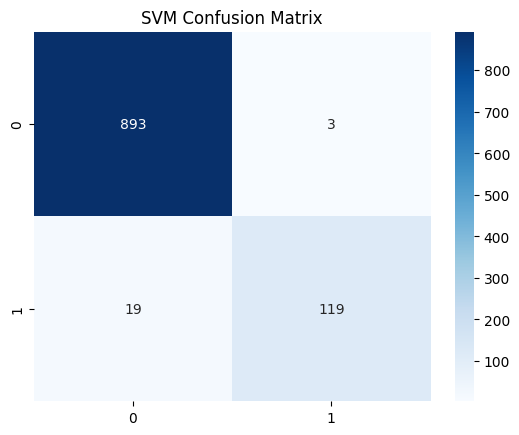

In [55]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.savefig('SVMConfusionMatrix.png')
plt.show()

In [56]:
'''
The model is highly accurate at identifying non-spam emails.
'''

'\nThe model is highly accurate at identifying non-spam emails.\n'

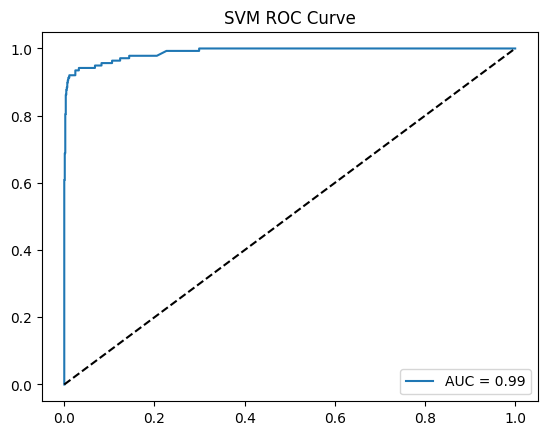

In [57]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("SVM ROC Curve")
plt.savefig('RocCurve.png')
plt.legend()
plt.show()

In [58]:
'''
AUC (Area Under Curve) is likely to be above 0.95, which indicates very strong performance.
'''

'\nAUC (Area Under Curve) is likely to be above 0.95, which indicates very strong performance.\n'

In [60]:
import pickle

# Assuming you have a trained model (e.g., model) and vectorizer (e.g., vectorizer)
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

NameError: name 'svm_model' is not defined